In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display  #To display multiple outputs from a cell
pd.set_option('display.max_rows', 100) #Limit max number of rows to display

#### Task is to predict conversion rate

Dataset description:

country : user country based on the IP address  
age : user age. Self-reported at sign-in step  
new_user : whether the user created the account during this session or had already an account and simply came back to the site  
source : marketing channel source  
         * Ads: came to the site by clicking on an advertisement  
         * Seo: came to the site by clicking on search results  
         * Direct: came to the site by directly typing the URL on the browser  
total_pages_visited: number of total pages visited during the session  
converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything.  

### Load Data

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Preliminary Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
# Summary of quantitative variables
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
# Summary of qualitative variables
df.describe(exclude = [np.number])

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


In [6]:
# Qualitative variable categories and their counts - Before imputing missing values NAN is taken as another category

for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        cat = df[col_name].value_counts().sort_values(ascending=False)
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print cat
        print 

Feature 'country' has 4 unique categories
US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

Feature 'source' has 3 unique categories
Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64



### Data Cleaning - Duplicates, Missing Values and Outliers

In [7]:
# Display duplicate records
df[df.duplicated() == True]

,country,age,new_user,source,total_pages_visited,converted
88,US,28,1,Seo,4,0
89,US,25,1,Ads,5,0
110,US,29,0,Ads,5,0
144,US,37,1,Direct,7,0
148,US,19,1,Ads,3,0
150,US,26,0,Seo,3,0
190,US,26,1,Seo,3,0
191,US,31,1,Seo,7,0
194,US,27,1,Seo,2,0
215,US,40,1,Seo,2,0


In [8]:
# Drop duplicate records
df = df.drop_duplicates()

In [9]:
# Check how many records are remaining
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            315084, 315234, 315257, 315398, 315521, 315659, 315777, 315892,
            316076, 316098],
           dtype='int64', length=16297)

In [10]:
# Display all records containing missing data
df[df.isnull().any(axis=1)]

,country,age,new_user,source,total_pages_visited,converted


In [11]:
# Count of Missing values per column
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [12]:
# Check imbalance in data set
df['converted'].value_counts()

0    11969
1     4328
Name: converted, dtype: int64

In [13]:
# Check Outliers
df.describe()

,age,new_user,total_pages_visited,converted
count,16297.000000,16297.000000,16297.000000,16297.00000
mean,33.847702,0.500153,9.004541,0.26557
std,11.460386,0.500015,5.423338,0.44165
min,17.000000,0.000000,1.000000,0.00000
25%,24.000000,0.000000,5.000000,0.00000
50%,32.000000,1.000000,9.000000,0.00000
75%,42.000000,1.000000,13.000000,1.00000
max,123.000000,1.000000,29.000000,1.00000


In [14]:
# Remove outliers i.e. age > 100
df = df.loc[df.age < 100]

### Datatype Conversion of Columns

In [15]:
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [16]:
# Can be done only after imputation
# new_user is effectively a categorical variable - 1 and 0
# target - converted is also effectively a categorical variable
df['new_user'] = df['new_user'].astype('object') 
df['converted'] = df['converted'].astype('object')

In [17]:
df.dtypes

country                object
age                     int64
new_user               object
source                 object
total_pages_visited     int64
converted              object
dtype: object

### Exploratory Data Analysis

In [18]:
# Qualitative variable categories and their counts - After imputing missing values else it will take NAN as another category

for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        cat = df[col_name].value_counts().sort_values(ascending=False)
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print cat
        print      

Feature 'country' has 4 unique categories
US         5814
UK         4312
China      3312
Germany    2857
Name: country, dtype: int64

Feature 'new_user' has 2 unique categories
1    8151
0    8144
Name: new_user, dtype: int64

Feature 'source' has 3 unique categories
Seo       6091
Ads       5300
Direct    4904
Name: source, dtype: int64

Feature 'converted' has 2 unique categories
0    11969
1     4326
Name: converted, dtype: int64



In [19]:
# List of numeric columns
num_cols = []

for col_name in df.columns:
    if df[col_name].dtypes != 'object':
        num_cols.append(col_name)   
        
print num_cols

['age', 'total_pages_visited']


In [20]:
# List of categorical columns
cat_cols = []

for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        cat_cols.append(col_name)  
        
print cat_cols

['country', 'new_user', 'source', 'converted']


#### Univariate Analysis

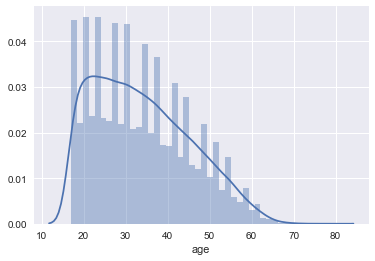

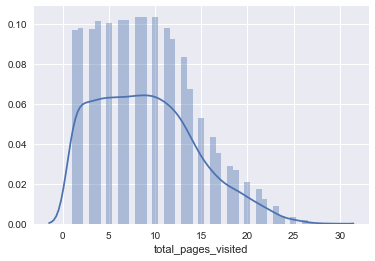

In [21]:
# Histogram + KDE of numeric variables 
for i,col_name in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(df[col_name])

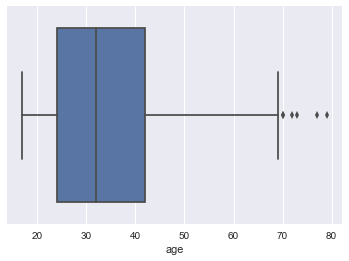

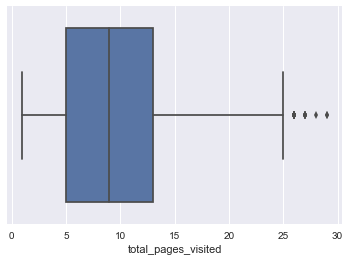

In [22]:
# Boxplot of numeric variables
for i,col_name in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(df[col_name])
    
# Note: Outliers cannot be defined here just by IQR in individual columns

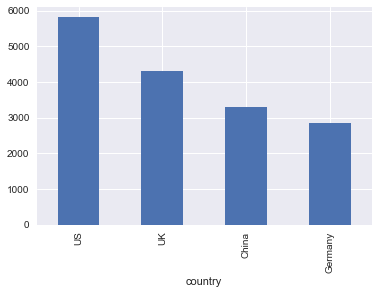

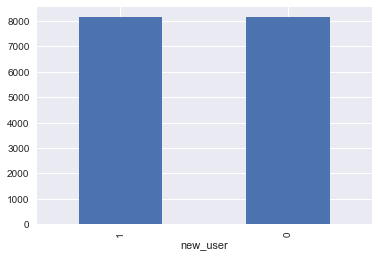

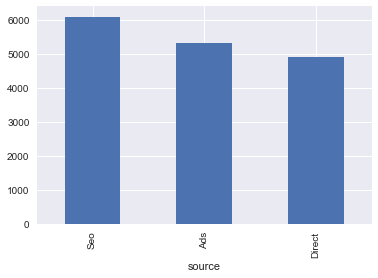

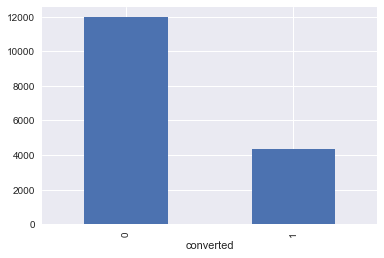

In [23]:
# Bar plot for frequency of categories in categorical variables
for i,col_name in enumerate(cat_cols):
    plt.figure(i)
    df[col_name].value_counts().plot(kind='bar')
    plt.xlabel(col_name)

#### Bivariate Analysis

Understand that an observed association between two variables can be misleading or even reverse direction when there is another
variable that interacts strongly with both variables (Simpson's Paradox)

In [24]:
# For better readability in plots 
df['converted'] = df['converted'].replace([0, 1], ['No', 'Yes'])

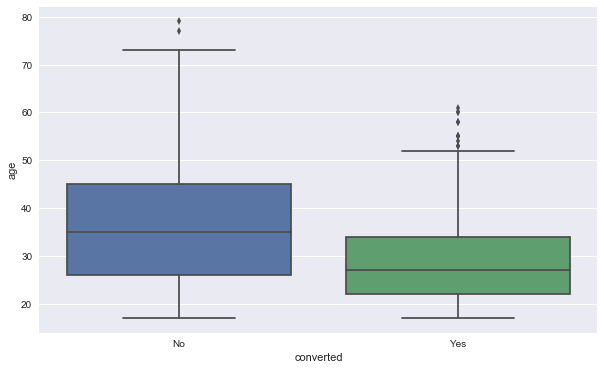

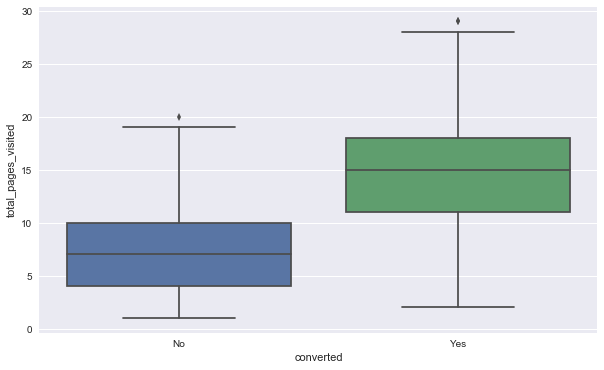

In [25]:
# Boxplot of target variable w.r.t. continuous variables
target = 'converted'
for i,col_name in enumerate(num_cols):
    plt.figure(i, figsize = (10,6))
    sns.boxplot(df[target], df[col_name])

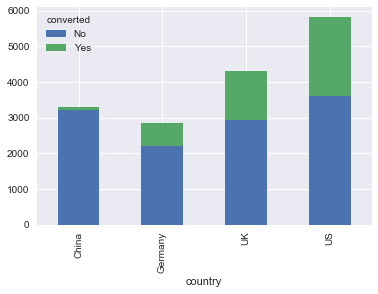

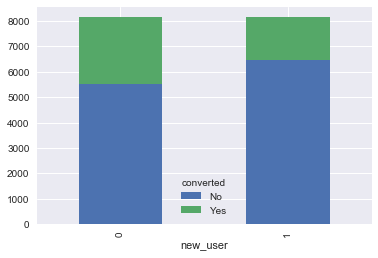

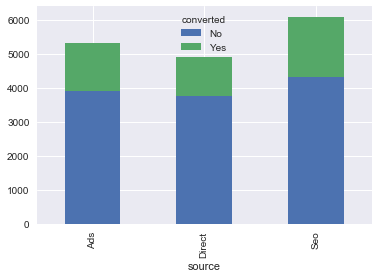

In [26]:
# Stacked Barplot of target variable w.r.t. categorical variable
target = 'converted'

cat_cols.remove(target)

for col_name in cat_cols:
    table = pd.crosstab(df[col_name], df[target])
    table.plot(kind='bar', stacked=True) 

#### Multivariate Analysis

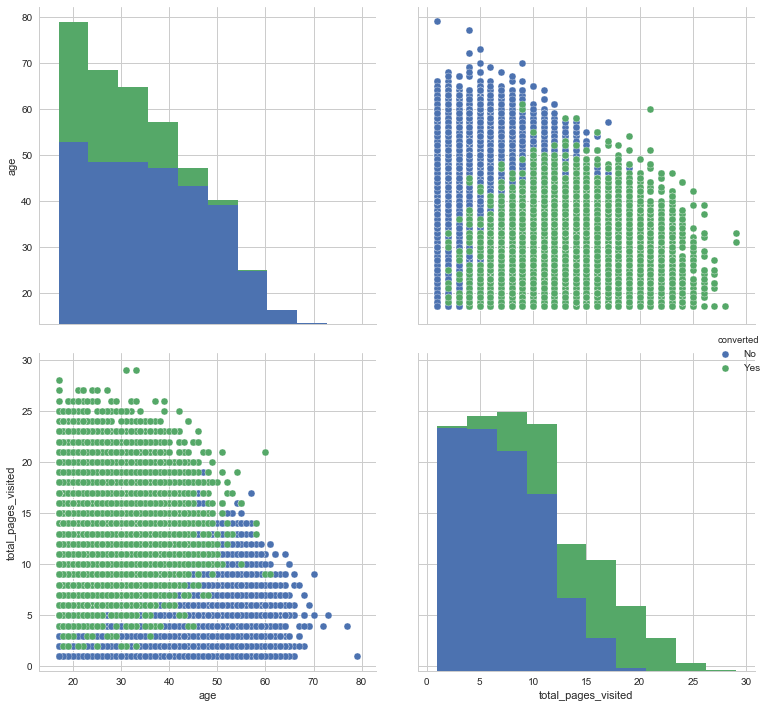

In [27]:
# Scatter plot matrix of numeric variables w.r.t. target (To check shape of decision boundary)
target = 'converted'

cols = cat_cols
df_num = df.drop(cols, axis=1)

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_num, hue=target, size=5)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [28]:
# Preprocessing - Nominal Categorical variables

# Create a list of features to dummy
todummy_list = ['country', 'source']

# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df


df = dummy_df(df, todummy_list)
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,No,0,0,1,0,1,0,0
1,23,1,5,No,0,0,0,1,0,0,1
2,28,1,4,No,0,0,0,1,0,0,1
3,39,1,5,No,1,0,0,0,0,0,1
4,30,1,6,No,0,0,0,1,0,0,1


In [29]:
# Code target variable
df['converted'] = df['converted'].replace(['No', 'Yes'], [0, 1])
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


### Partitioning into Train/Test Split

In [30]:
# In reality, this step should be done just after preliminary data exploration

y = df['converted']
X = df.drop('converted', axis = 1)

# Partition into train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80/20 split

#### Check imbalance and fix it in training data

In [31]:
y_train.value_counts()

0    9560
1    3476
Name: converted, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

C:\Users\prati\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [33]:
np.unique(y_train_sm, return_counts=True)

(array([0, 1], dtype=int64), array([9560, 9560], dtype=int64))

In [34]:
# Standardize
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train_sm)   # fit + transform
X_test = stdsc.transform(X_test)         # only transform
y_train = y_train_sm

print "\nAfter Standardizing\n"
display(X_train)
display(y_train) # indices will also appear
display(X_test)
display(y_test)



After Standardizing



array([[-0.19226081,  1.11116835, -1.32788142, ...,  1.46269887,
        -0.64404236, -0.80473312],
       [ 1.01636073,  1.11116835,  0.04237734, ..., -0.69932051,
         1.5882186 , -0.80473312],
       [-0.19226081,  1.11116835,  0.38494203, ...,  1.46269887,
        -0.64404236, -0.80473312],
       ..., 
       [-0.38447578, -0.95393229,  0.38494203, ..., -0.69932051,
        -0.64404236,  1.26917597],
       [-1.40088236,  1.11116835,  1.58391844, ..., -0.69932051,
         1.5882186 , -0.80473312],
       [-1.37334455, -0.95393229, -1.10586555, ..., -0.69932051,
         1.5882186 , -0.80473312]])

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

array([[ 0.36556452,  1.11116835,  0.72750672, ...,  1.46269887,
        -0.64404236, -0.80473312],
       [-0.56414436, -0.95393229,  1.24135375, ..., -0.69932051,
        -0.64404236,  1.26917597],
       [-0.47117347, -0.95393229, -0.128905  , ..., -0.69932051,
         1.5882186 , -0.80473312],
       ..., 
       [-0.93602792,  1.11116835, -1.49916376, ..., -0.69932051,
         1.5882186 , -0.80473312],
       [ 1.38824429,  1.11116835, -0.128905  , ..., -0.69932051,
        -0.64404236,  1.26917597],
       [-0.56414436, -0.95393229, -1.15659907, ...,  1.46269887,
        -0.64404236, -0.80473312]])

120241    0
240456    1
102803    0
145526    0
5876      0
4643      0
134435    0
65381     0
43492     0
4030      0
2485      1
4227      0
161992    1
18861     0
232880    1
27289     0
33215     0
2434      0
6538      0
20002     0
134375    1
172594    0
167148    0
255907    0
8677      0
164430    1
237792    0
138892    1
31807     0
89197     0
1819      0
870       0
1097      0
299788    1
109414    0
197896    0
73404     0
190042    0
186583    1
9085      0
19894     1
133800    0
112309    0
13139     0
55813     0
21644     1
109900    1
243775    0
892       0
284142    0
         ..
147104    1
5621      1
45480     1
12028     0
89553     0
63788     0
6639      0
8570      0
75757     0
49025     0
6382      0
6242      0
56783     0
39124     1
286940    1
1595      0
80406     0
15919     0
107392    1
1301      0
106718    0
53734     0
127469    0
7570      0
582       0
132404    1
40551     1
4202      0
220524    0
3907      0
20754     0
25181     0
1205

### Modeling 

#### Logistic Regression

In [35]:
# Running Logistic regression and Checking 

# Model Summary

import statsmodels.api as sm
X_df = X.drop(['country_US', 'source_Ads'], axis = 1) # Drop baseline category to avoid dummy variable trap (if more than 2 categories in a variable)
logit = sm.Logit(y.astype(float), X_df.astype(float))
result = logit.fit()
print result.summary()
print "Odds Ratio \n", np.exp(result.params)

C:\Users\prati\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.311695
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                16295
Model:                          Logit   Df Residuals:                    16287
Method:                           MLE   Df Model:                            7
Date:                Thu, 23 Nov 2017   Pseudo R-squ.:                  0.4614
Time:                        15:02:43   Log-Likelihood:                -5079.1
converged:                       True   LL-Null:                       -9430.1
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0981      0.002    -46.107      0.000      -0.102      -0.094
ne

C:\Users\prati\Anaconda2\lib\site-packages\statsmodels\discrete\discrete_model.py:2405: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  return stats.chisqprob(self.llr, self.df_model)



Best Score = 0.842069778155

Best params: {'C': 0.3}

Best Estimator: LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


 Logistic Regression Model 
[('age', -0.78429778679521711), ('country_China', -0.89948358647552573), ('country_Germany', 0.005316887932708696), ('country_UK', 0.2051949433657673), ('country_US', 0.4511772249710666), ('new_user', -0.39164337648054742), ('source_Ads', -0.032858559606099902), ('source_Direct', -0.083540827854499705), ('source_Seo', 0.10913407028496842), ('total_pages_visited', 2.1569432510841438)]
Training Error
Accuracy score =  0.840951882845
Precision score =  0.834204860043
Recall score =  0.851046025105
F1 score =  0.842541293429

Test Error
Accuracy score =  0.835839214483
Precision score =  0.634730538922
Recall score =  0.8729411764

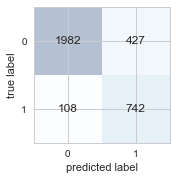

In [36]:
def classification_logistic(X_train,y_train,X_test,y_test,target,scoring_param='f1'):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    
    lreg = LogisticRegression()

    reg_param = [0.3, 0.5, 1.0]

    param_grid = {'C': reg_param}

    gs = GridSearchCV(estimator=lreg, param_grid=param_grid, scoring=scoring_param, cv=5, n_jobs=-1)

    gs.fit(X_train, y_train)

    print "\nBest Score = {}".format(gs.best_score_)
    print "\nBest params: {}".format(gs.best_params_)
    print "\nBest Estimator: {}".format(gs.best_estimator_)
    print

    lreg = gs.best_estimator_

    # Coefficients of logistic Regression
    print "\n Logistic Regression Model \n", 
    print sorted(zip(df.columns[df.columns != target], np.ravel(lreg.coef_)))

    print "Training Error"
    print "Accuracy score = ", accuracy_score(y_train, lreg.predict(X_train))
    print "Precision score = ", precision_score(y_train, lreg.predict(X_train))
    print "Recall score = ", recall_score(y_train, lreg.predict(X_train))
    print "F1 score = ", f1_score(y_train, lreg.predict(X_train))
    print 


    print "Test Error"
    print "Accuracy score = ", accuracy_score(y_test, lreg.predict(X_test))
    print "Precision score = ", precision_score(y_test, lreg.predict(X_test))
    print "Recall score = ", recall_score(y_test, lreg.predict(X_test))
    print "F1 score = ", f1_score(y_test, lreg.predict(X_test))
    print 

    # Plot confusion matrix
    from mlxtend.evaluate import confusion_matrix
    from mlxtend.plotting import plot_confusion_matrix
    import matplotlib.pyplot as plt
    y_pred = lreg.predict(X_test)
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    return lreg 

lreg = classification_logistic(X_train,y_train,X_test,y_test,'converted')

#### Random Forest Classification

{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': None, 'max_features': 'auto', 'max_depth': None, 'class_weight': None}

Best Score = 0.861726911397

Best params: {'max_features': 'sqrt', 'n_estimators': 10, 'max_depth': 4}

Best Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


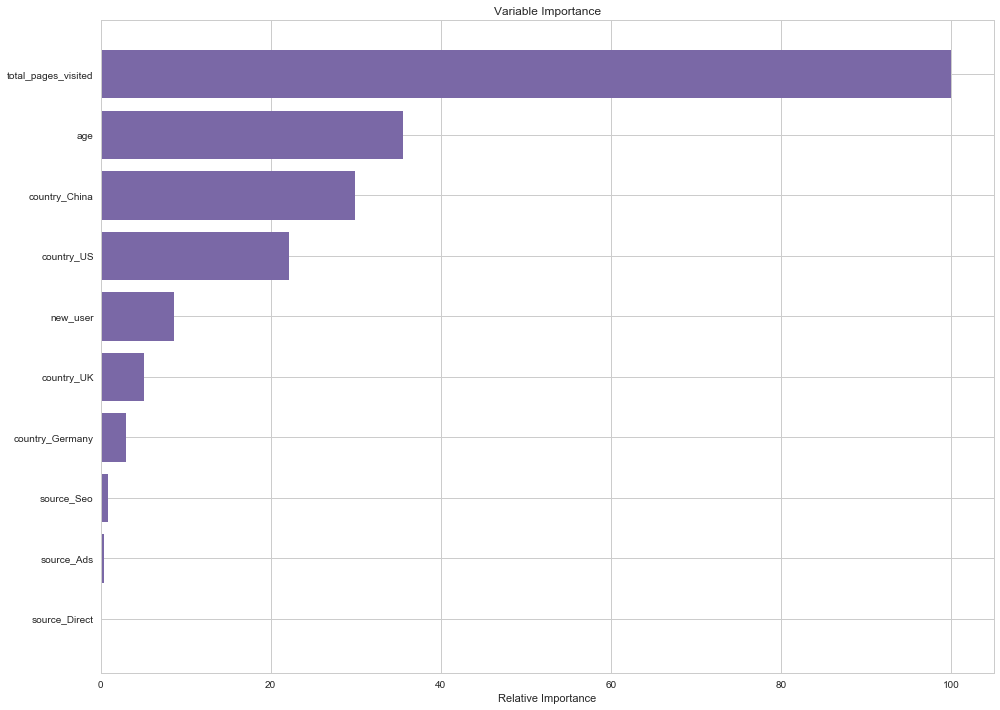

Training Error
Accuracy score =  0.857531380753
Precision score =  0.837813797193
Recall score =  0.886715481172
F1 score =  0.861571297896

Test Error
Accuracy score =  0.822031297944
Precision score =  0.618006993007
Recall score =  0.831764705882
F1 score =  0.709127382146



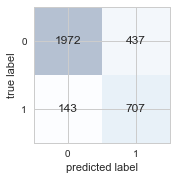

In [37]:
def classification_randomForest(X_train, y_train, X_test, y_test, target, scoring_param='f1'):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    import matplotlib.pyplot as plt
    import numpy as np
    
    rf = RandomForestClassifier()
    print rf.get_params()
    
    estimator_range = [10, 100, 1000]
    feature_range = ['sqrt', 'log2']
    depth_range = [3, 4]
    #Overall 3*2*2 = 12 combinations with five times CV

    param_grid = {'n_estimators': estimator_range, 'max_features': feature_range, 'max_depth' : depth_range}

    gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring_param, cv=5, n_jobs=-1)

    gs.fit(X_train,y_train)

    print "\nBest Score = {}".format(gs.best_score_)
    print "\nBest params: {}".format(gs.best_params_)
    print "\nBest Estimator: {}".format(gs.best_estimator_)
    
    rf = gs.best_estimator_
    
    feature_importance = rf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(df.columns[df.columns != target])[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    print "Training Error"
    print "Accuracy score = ", accuracy_score(y_train, rf.predict(X_train))
    print "Precision score = ", precision_score(y_train, rf.predict(X_train))
    print "Recall score = ", recall_score(y_train, rf.predict(X_train))
    print "F1 score = ", f1_score(y_train, rf.predict(X_train))
    print 


    print "Test Error"
    print "Accuracy score = ", accuracy_score(y_test, rf.predict(X_test))
    print "Precision score = ", precision_score(y_test, rf.predict(X_test))
    print "Recall score = ", recall_score(y_test, rf.predict(X_test))
    print "F1 score = ", f1_score(y_test, rf.predict(X_test))
    print 

    # Plot confusion matrix
    from mlxtend.evaluate import confusion_matrix
    from mlxtend.plotting import plot_confusion_matrix
    import matplotlib.pyplot as plt
    y_pred = rf.predict(X_test)
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    return rf
    
rf = classification_randomForest(X_train, y_train, X_test, y_test, 'converted')

#### Gradient Boosting Classification

{'presort': 'auto', 'loss': 'deviance', 'min_impurity_decrease': 0.0, 'verbose': 0, 'subsample': 1.0, 'max_leaf_nodes': None, 'learning_rate': 0.1, 'warm_start': False, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 2, 'init': None, 'min_weight_fraction_leaf': 0.0, 'criterion': 'friedman_mse', 'random_state': None, 'min_impurity_split': None, 'max_features': None, 'max_depth': 3}

Best Score = 0.870328373507

Best params: {'max_features': 'sqrt', 'n_estimators': 10, 'learning_rate': 0.1, 'max_depth': 7}

Best Estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              wa

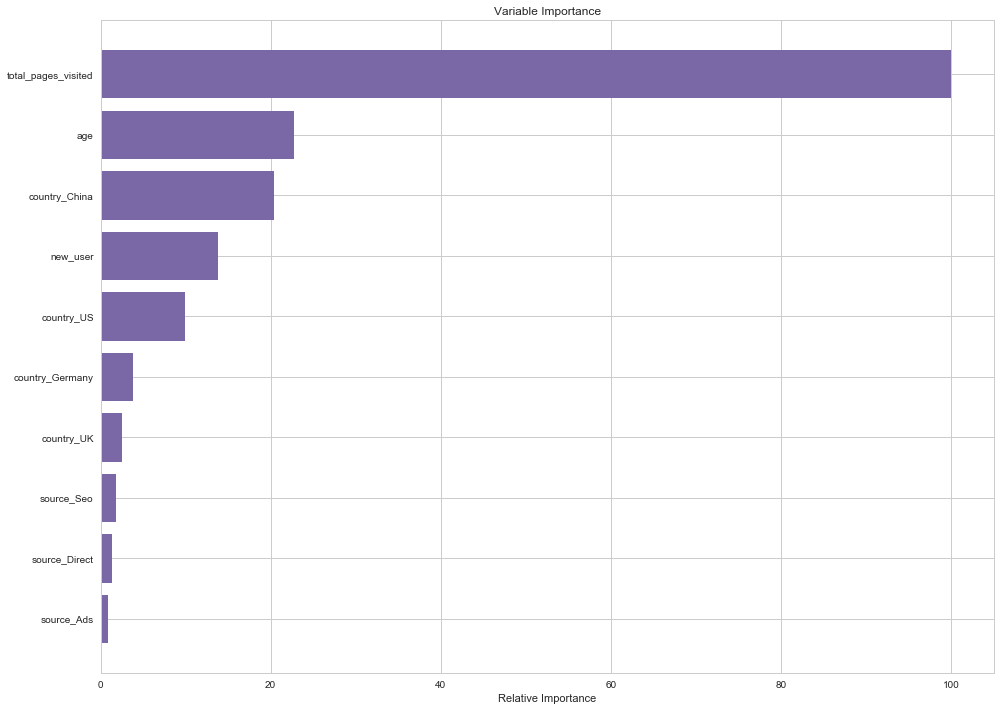

Training Error
Accuracy score =  0.881694560669
Precision score =  0.851473704489
Recall score =  0.924686192469
F1 score =  0.886571056063

Test Error
Accuracy score =  0.828781834919
Precision score =  0.628747795414
Recall score =  0.838823529412
F1 score =  0.71875



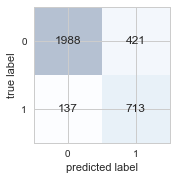

In [38]:
def classification_gradientBoosting(X_train, y_train, X_test, y_test, target, scoring_param='f1'):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier
    import matplotlib.pyplot as plt
    import numpy as np
    
    gb = GradientBoostingClassifier()
    print gb.get_params()
    
    estimator_range = [10, 100, 1000]
    learning_rate_range = [0.1, 0.2]
    max_depth_range = [3, 5, 7]
    feature_range = ['sqrt', 'log2']

    param_grid = {'n_estimators': estimator_range, 'learning_rate': learning_rate_range, 'max_depth': max_depth_range, 'max_features': feature_range}

    gs = GridSearchCV(estimator=gb, param_grid=param_grid, scoring=scoring_param, cv=2, n_jobs=-1)
    gs.fit(X_train,y_train)
    
    print "\nBest Score = {}".format(gs.best_score_)
    print "\nBest params: {}".format(gs.best_params_)
    print "\nBest Estimator: {}".format(gs.best_estimator_)
    
    gb = gs.best_estimator_
    
    feature_importance = gb.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(df.columns[df.columns != target])[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    print "Training Error"
    print "Accuracy score = ", accuracy_score(y_train, gb.predict(X_train))
    print "Precision score = ", precision_score(y_train, gb.predict(X_train))
    print "Recall score = ", recall_score(y_train, gb.predict(X_train))
    print "F1 score = ", f1_score(y_train, gb.predict(X_train))
    print 


    print "Test Error"
    print "Accuracy score = ", accuracy_score(y_test, gb.predict(X_test))
    print "Precision score = ", precision_score(y_test, gb.predict(X_test))
    print "Recall score = ", recall_score(y_test, gb.predict(X_test))
    print "F1 score = ", f1_score(y_test, gb.predict(X_test))
    print 

    # Plot confusion matrix
    from mlxtend.evaluate import confusion_matrix
    from mlxtend.plotting import plot_confusion_matrix
    import matplotlib.pyplot as plt
    y_pred = gb.predict(X_test)
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
    return gb
    
gb = classification_gradientBoosting(X_train, y_train, X_test, y_test, 'converted')

In [39]:
X.columns

Index([u'age', u'new_user', u'total_pages_visited', u'country_China',
       u'country_Germany', u'country_UK', u'country_US', u'source_Ads',
       u'source_Direct', u'source_Seo'],
      dtype='object')

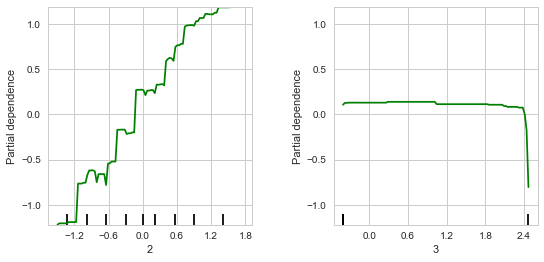

In [40]:
# Partial dependence plot for interpretation of the model (defined only on training data)

from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, axs = plot_partial_dependence(gb, X_train, features = [2,3]) # The features are the column numbers from the X array 

# One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear)
# Also it can tell direction ( +ve or -ve relationship)

### Threshold/Cut-off Analysis - ROC or PR curve

#### ROC 

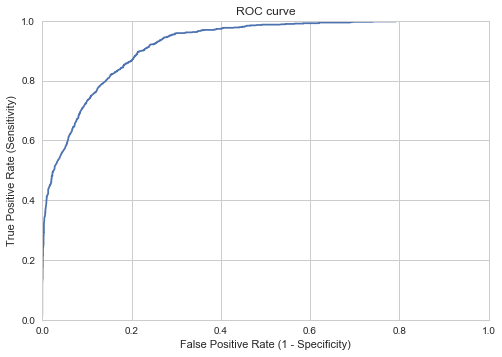

In [41]:
# Plot ROC Curve for the best performing classifier e.g. gradient boosting

from sklearn.metrics import roc_curve
y_pred_prob = gb.predict_proba(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_roc_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
# Aim is to maximize both sensitivity and specificity
evaluate_roc_threshold(0.5224)

('Sensitivity:', 0.8294117647058824)
('Specificity:', 0.8368617683686177)


In [43]:
# Find optimal cut off point 
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.loc[(roc.tf-0).abs().argsort()[:1]]

,1-fpr,fpr,tf,thresholds,tpr
292,0.831465,0.168535,0.000299,0.510988,0.831765


 Confusion Matrix


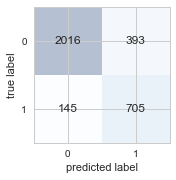

Accuracy score =  0.834918686714
Precision score =  0.642076502732
Recall score =  0.829411764706
F1 score =  0.723819301848


In [45]:
# Classifier performance on the new threshold

# store the predicted probabilities for class 1
y_pred_prob = [gb.predict_proba(X_test)[:,1]]
from sklearn.preprocessing import binarize
# it will return 1 for all values above optimum threshold and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob, 0.5222)[0]

# Print confusion matrix
print "Confusion Matrix"
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred_class, 
                      binary=True)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

# Print Classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print "Accuracy score = ", accuracy_score(y_test, y_pred_class)
print "Precision score = ", precision_score(y_test, y_pred_class)
print "Recall score = ", recall_score(y_test, y_pred_class)
print "F1 score = ", f1_score(y_test, y_pred_class)

#### PR

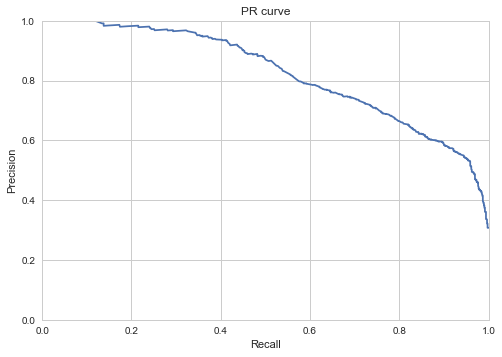

In [46]:
# Plot PR Curve for the best performing classifier e.g. gradient boosting
from sklearn.metrics import precision_recall_curve
y_pred_prob = gb.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])


plt.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [47]:
# define a function that accepts a threshold and prints precision and recall
def evaluate_pr_threshold(threshold):
    pt = zip(thresholds,precision)
    rt = zip(thresholds,recall)
    print('Precision:', [p for p in pt if p[0] > threshold][0][1])
    print('Recall:', [r for r in rt if r[0] > threshold][0][1])
    
# Aim is to maximize both precision and recall
evaluate_pr_threshold(0.7)

('Precision:', 0.88172043010752688)
('Recall:', 0.4823529411764706)


In [48]:
# Find optimal cut off point 
# The optimal cut off would be where precision and recall are both high 
# precision - recall is zero or near to zero is the optimal cut off point

i = np.arange(len(thresholds)) # index for df
recall = recall[:-1] # recall : array, shape = [n_thresholds + 1]
precision = precision[:-1] # precision : array, shape = [n_thresholds + 1]
roc = pd.DataFrame({'recall' : pd.Series(recall, index=i),'precision' : pd.Series(precision, index = i), 'tf' : pd.Series(precision - recall, index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.loc[(roc.tf-0).abs().argsort()[:1]]

,precision,recall,tf,thresholds
1021,0.722679,0.723529,-0.00085,0.592754


 Confusion Matrix


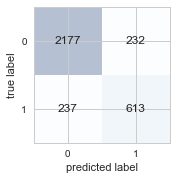

Accuracy score =  0.856090825407
Precision score =  0.725443786982
Recall score =  0.721176470588
F1 score =  0.723303834808


In [50]:
# Classifier performance on the new threshold

# store the predicted probabilities for class 1
y_pred_prob = [gb.predict_proba(X_test)[:,1]]
from sklearn.preprocessing import binarize
# it will return 1 for all values above optimum threshold and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob, 0.5971)[0]

# Print confusion matrix
print "Confusion Matrix"
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred_class, 
                      binary=True)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

# Print Classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print "Accuracy score = ", accuracy_score(y_test, y_pred_class)
print "Precision score = ", precision_score(y_test, y_pred_class)
print "Recall score = ", recall_score(y_test, y_pred_class)
print "F1 score = ", f1_score(y_test, y_pred_class)

##### Analyzing Error & Re-iterating - Some tips

* Feature Engineering
* Cluster and then apply different classification model for each cluster
* Ensemble Technique
* If missing values were large initially, analyze the effect of imputing or apply other imputation techniques